#Median House Value with one-hidden layer neural networks (Classification)
### Tensorflow 2

## Import libraries 



Runtime type has been set to GPU

In [ ]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


## 2. Load data

In [ ]:
# Modify the paths accordingly to point the csv files in your own gdrive file system.
ATT_FILE = "/gdrive/My Drive/Colab Notebooks/datasets/Housing/MedianHouseValue/MedianHouseValuePreparedCleanAttributes.csv"
LABEL_FILE = "/gdrive/My Drive/Colab Notebooks/datasets/Housing/MedianHouseValue/MedianHouseValueOneHotEncodedClasses.csv"

TRAIN_RATE=0.8 # 80% of the entire dataset is for training purposes

attributes = pd.read_csv(ATT_FILE)
label = pd.read_csv(LABEL_FILE)

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)
#n_final_test = n_instances-n_train-n_dev

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train+n_dev]
t_dev = label.values[n_train:n_train+n_dev]

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

# We can not employ the final test set yet, since this is not the final neural approach 

x_train: (16342, 9)
t_train: (16342, 3)
x_dev: (2043, 9)
t_dev: (2043, 3)


## 3. Initialize variables

In [ ]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))

Some data is displayed to test correctness:

In [ ]:
x_train[:5]

array([[ 0.21713147, -0.69394261,  0.41176471, -0.93926446, -0.88733706,
        -0.90924634, -0.89278079, -0.77585137, -1.        ],
       [-0.69322709,  0.17747078, -0.29411765, -0.91795107, -0.88671633,
        -0.95448303, -0.88949186, -0.59159184,  1.        ],
       [ 0.44820717, -0.95961743,  0.37254902, -0.8306628 , -0.80074488,
        -0.89349477, -0.79575728, -0.5589716 ,  1.        ],
       [ 0.29083665, -0.7088204 , -0.41176471, -0.87629076, -0.85909373,
        -0.94315984, -0.84377569, -0.48705535, -1.        ],
       [-0.40039841,  0.15834219, -0.49019608, -0.8418536 , -0.84574798,
        -0.93413493, -0.82765992, -0.16468738, -0.33333333]])

In [ ]:
t_train[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
x_dev[:5]

array([[ 0.22908367, -0.67906482,  0.45098039, -0.83366397, -0.77343265,
        -0.81524146, -0.76155238, -0.67868029, -1.        ],
       [-0.61752988,  0.10308183,  1.        , -0.94201129, -0.93078833,
        -0.97247681, -0.93257688, -0.37100178,  0.33333333],
       [-0.39043825,  0.16046759, -0.88235294, -0.92929447, -0.90037244,
        -0.90016536, -0.89870087, -0.74136908, -0.33333333],
       [-0.24701195, -0.45377258, -0.33333333, -0.85156926, -0.82774674,
        -0.94030102, -0.81877981, -0.58286093, -1.        ],
       [ 0.22908367, -0.73645058, -0.25490196, -0.90589552, -0.82774674,
        -0.90420135, -0.81746423, -0.86805699,  1.        ]])

In [ ]:
t_dev[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
x_train = tf.cast(x_train,tf.float32)
t_train = tf.cast(t_train,tf.float32)
x_dev = tf.cast(x_dev,tf.float32)
t_dev = tf.cast(t_dev,tf.float32)

## 4. Set hyperparameters

The learning rate $\alpha$, the batch size, and the number of neurons in the hidden layer are the three hyperparameters to adjust. The learning process stops when it reaches 20,000 learning iterations. An iteration comprises presenting the network *batch_size* learning examples and then adjusting the weights (parameters).

In [ ]:
n_iterations = 20000 
learning_rate = 0.1
batch_size = 500
n_hidden = 1000

## 5. Build the model: a full-connected 9-1000-3 neural network architecture

In [ ]:
W1 = tf.Variable (tf.random.uniform ([INPUTS,n_hidden],-1,1), name="W1")
b1 = tf.Variable (tf.zeros([n_hidden]), name = "bias1")
W2 = tf.Variable (tf.random.uniform ([n_hidden,OUTPUTS],-1,1), name="W2")
b2 = tf.Variable (tf.zeros([OUTPUTS]), name = "bias2")

The following code defines a classical multilayer perceptron: X is the input vector with nine components, 1,000 neurons in the hidden layer with **tanh activation function**, and three outputs with the softmax activation function.

In [ ]:
def net (X):
  hidden = tf.nn.tanh(tf.add(tf.matmul(X,W1),b1), name="hidden")
  return tf.add (tf.matmul(hidden,W2),b2, name="net_out")

def predict (X):
  return tf.nn.softmax (logits=net(X), name="y")

The *log-loss*, *cross-entropy* $\mathcal{L}$ (the sun of log-loss is a loss) and the *cost* $J$ (the mean of cross-entropy) functions: $J(W) = \frac{1}{m}\sum_{p=1}^{m}\mathcal{L}^{(p)}(y,t)$, where $\mathcal{L}^{(p)}(y,t)=-\sum_{i=1}^{n_y}t_i\log (y_i).$

In [ ]:
def mean_log_loss (n,t):
  cross_entropy = tf.nn.softmax_cross_entropy_with_logits (labels=t, logits=n)
  return tf.reduce_mean (cross_entropy, name="cost")

The training algorithm is the gradient descent method:

In [ ]:
def training_op(x, t, alpha_lr):
        #First the we compute the error 
        with tf.GradientTape(persistent=True) as g: #persistent=True so parameters can change more than once
            error = mean_log_loss(net(x),t)

        #Then, the partial derivative of the error function regarding the weights from the top to the bottom
        dE_dW2 = g.gradient(error, W2)
        dE_db2 = g.gradient(error, b2)
        
        dE_dW1 = g.gradient(error, W1)
        dE_db1 = g.gradient(error, b1)
        
               
        #Finally, we multiply the partial derivative by the learning rate and apply the increment 
        W1.assign_sub(alpha_lr * dE_dW1)
        b1.assign_sub(alpha_lr * dE_db1)

        W2.assign_sub(alpha_lr * dE_dW2)
        b2.assign_sub(alpha_lr * dE_db2)

        return error

Model evaluation: accuracy. The percentage of correctly classified instances.

In [ ]:
def correct_predictions (y,t):
  return tf.equal(tf.argmax(y,1),tf.argmax(t,1))

def accuracy (y,t):
  return tf.reduce_mean(tf.cast(correct_predictions(y,t),tf.float32))

## 6. Execute the model MBGD
Since the batch size is 500 and the number of examples is 16,342, there are 33 iterations per epoch. Therefore 20,000 iterations are equivalent to about 600 epochs.  

In [ ]:
accuracy_train_history = np.empty([n_iterations])
error_train_history = np.empty([n_iterations])
for iteration in tqdm(range(n_iterations)):
  offset = (iteration * batch_size) % (NUM_TRAINING_EXAMPLES - batch_size)
  error = training_op (x_train[offset:(offset+batch_size)], 
                       t_train[offset:(offset+batch_size)], learning_rate)
  accuracy_train_history[iteration] = accuracy (predict(x_train[offset:(offset+batch_size)]), 
                                                        t_train[offset:(offset+batch_size)])
  error_train_history[iteration] = error
    

100%|██████████| 20000/20000 [02:47<00:00, 119.10it/s]


## Get the results

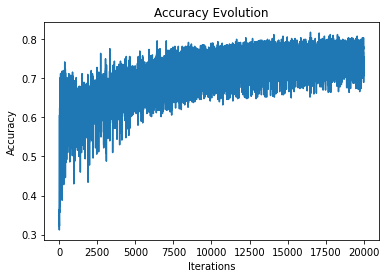

In [ ]:
plt.title ("Accuracy Evolution")
plt.xlabel ("Iterations")
plt.ylabel ("Accuracy")
plt.plot (range(n_iterations),accuracy_train_history)

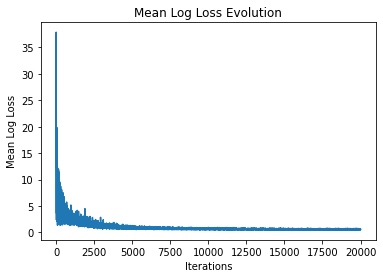

In [ ]:
plt.title ("Mean Log Loss Evolution")
plt.xlabel ("Iterations")
plt.ylabel ("Mean Log Loss")
plt.plot (range(n_iterations),error_train_history)

Note the accuracy $zig$-$zags$ due to mini-batch $zig$-$zagging$ errors, yet the trend is positive.  

In [ ]:
final_accuracy_train = accuracy (predict(x_train),t_train)
final_accuracy_dev = accuracy (predict(x_dev),t_dev)
final_train_mean_log_loss = mean_log_loss(net(x_train),t_train)
final_dev_mean_log_loss = mean_log_loss(net(x_dev),t_dev)

print ("Final Accuracy in training: "+str(final_accuracy_train.numpy()))
print ("Final Accuracy for the development test set: "+str(final_accuracy_dev.numpy()))
print ("Final training mean-log-loss in training: "+str(final_train_mean_log_loss.numpy()))
print ("Final mean-log-loss for the development test set: "+str(final_dev_mean_log_loss.numpy()))

Final Accuracy in training: 0.7623302
Final Accuracy for the development test set: 0.75624084
Final training mean-log-loss in training: 0.55060273
Final mean-log-loss for the development test set: 0.54778117


In [ ]:
predictions = predict(x_dev)
predictions[:20].numpy()

array([[3.0701756e-01, 6.8484116e-01, 8.1413267e-03],
       [1.4287152e-03, 6.5918408e-02, 9.3265283e-01],
       [6.1058760e-01, 3.8474438e-01, 4.6680951e-03],
       [7.1074203e-02, 3.9396298e-01, 5.3496283e-01],
       [2.4671483e-01, 6.8253392e-01, 7.0751220e-02],
       [6.1851060e-03, 4.4859138e-01, 5.4522347e-01],
       [1.0699939e-03, 1.6754314e-01, 8.3138686e-01],
       [4.2196320e-05, 2.2528470e-02, 9.7742927e-01],
       [3.2011400e-07, 5.6637145e-05, 9.9994302e-01],
       [3.9153236e-01, 5.5790550e-01, 5.0562132e-02],
       [6.8452820e-02, 8.1904292e-01, 1.1250435e-01],
       [5.2843344e-01, 4.3201599e-01, 3.9550610e-02],
       [4.7622779e-01, 3.0000928e-01, 2.2376294e-01],
       [2.1446067e-01, 7.1219826e-01, 7.3341109e-02],
       [6.0228598e-01, 3.9544654e-01, 2.2674769e-03],
       [5.5528884e-03, 1.2704985e-01, 8.6739731e-01],
       [9.3723351e-01, 6.2184330e-02, 5.8219756e-04],
       [5.0788018e-05, 2.0217605e-02, 9.7973162e-01],
       [4.5452304e-02, 8.907

In [ ]:
rounded_predictions=np.round(predictions)
indices = np.argmax(predictions,1)
for row, index in zip(rounded_predictions, indices): row[index]=1
rounded_predictions[:20]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
t_dev[:20].numpy()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
dev_predictions = correct_predictions(predict(x_dev),t_dev).numpy()
dev_predictions[:20]

array([False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [ ]:
from collections import Counter
Counter(dev_predictions)

Counter({False: 498, True: 1545})

**Train accuracy is now 76%, and dev accuracy has risen to 75%**.  Then, the neural model is not overfitted. The time spent is about 2:40 minutes. Mini-batch gradient descent has been applied. Backpropagation makes intensive vector computation. TPU has been employed, but the operations performed on the CPU to calculate the offset delay the whole process. 